In [1]:
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
from src.features.soundlevel import soundlevel_for_file, compute_leq, compute_ln
from src.utils import fileutils

The file below can be downloaded from: [Google Drive](https://drive.google.com/file/d/1JhLK4eKbTd0zfHAEqn8fsa9Qo-66b0Q-/view?usp=sharing)

In [2]:
file = os.path.join('C:\\Users\\Blake\\PycharmProjects\\1090AudioLogger\\env_logs\\FINAL', '4-1--2023-05-16_11_51-Environment-32-minutes.wav')

In [3]:
file

'C:\\Users\\Blake\\PycharmProjects\\1090AudioLogger\\env_logs\\FINAL\\4-1--2023-05-16_11_51-Environment-32-minutes.wav'

In [4]:
df, meta = soundlevel_for_file(file)

In [5]:
df.head()

,0
time,
0 days 00:00:00,-84.183614
0 days 00:00:00.031247166,-84.138627
0 days 00:00:00.062494331,-83.673554
0 days 00:00:00.093741497,-84.075882
0 days 00:00:00.124988662,-84.396245


In [6]:
decibels = np.asarray(df[0])

In [7]:
def get_moving_ln(array, win):
    values = []
    for i in range(0, (len(array)-win)):
        start=i
        end=i+win
        values.append(compute_ln(array[start:end], n=90))
        
    values = np.insert(np.asarray(values), obj=0, values=[np.nan for i in range(win//2)])
    values = np.insert(np.asarray(values), obj=(df.shape[0]-(win//2)), values=[np.nan for i in range(win//2)])
    return values

In [8]:
df = df.rename(columns={0: 'dBA'})

In [9]:
# calculate moving L90 for t seconds
df['mln1'] = get_moving_ln(array=decibels, win=32)
df['mln10'] = get_moving_ln(array=decibels, win=32*10)
df['mln30'] = get_moving_ln(array=decibels, win=32*30)
df['mln60'] = get_moving_ln(array=decibels, win=32*60)
df['mln120'] = get_moving_ln(array=decibels, win=32*120)
df['mln180'] = get_moving_ln(array=decibels, win=32*180)
df['mln300'] = get_moving_ln(array=decibels, win=32*300)

### dBA Histogram

In [10]:
db_bins = [i for i in range(-100, 1)]

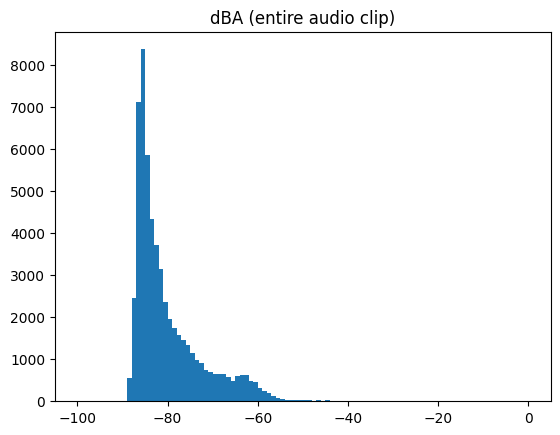

In [11]:
plt.hist(df['dBA'], bins=db_bins)
plt.title('dBA (entire audio clip)')
plt.show()

### dBA - t-second rolling L90 Histograms

In [12]:
diff_bins = [i for i in range(-20, 50)]

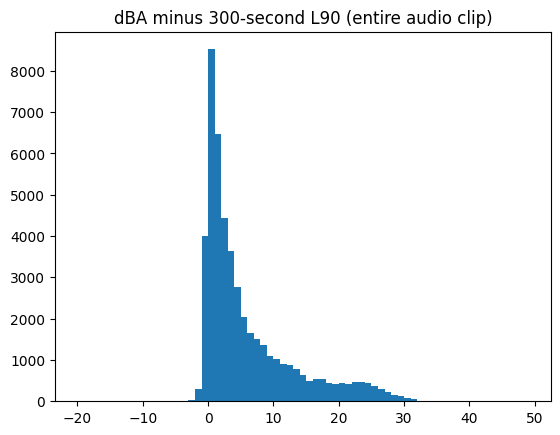

In [13]:
plt.hist((df['dBA']-df['mln300']), bins=diff_bins)
plt.title('dBA minus 300-second L90 (entire audio clip)')
plt.show()

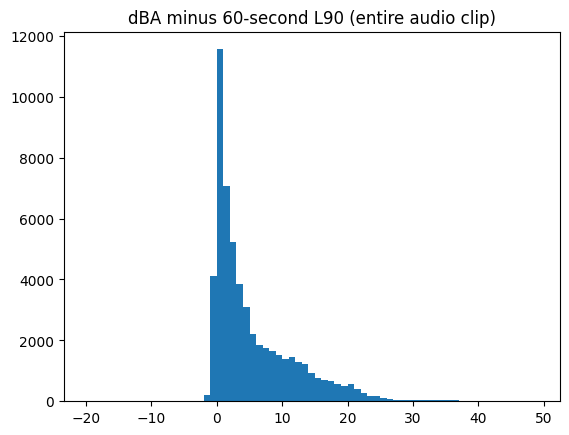

In [14]:
#df['diff'] = df['dBA']-df['mln60']
plt.hist(df['dBA']-df['mln60'], bins=diff_bins)
plt.title('dBA minus 60-second L90 (entire audio clip)')
plt.show()

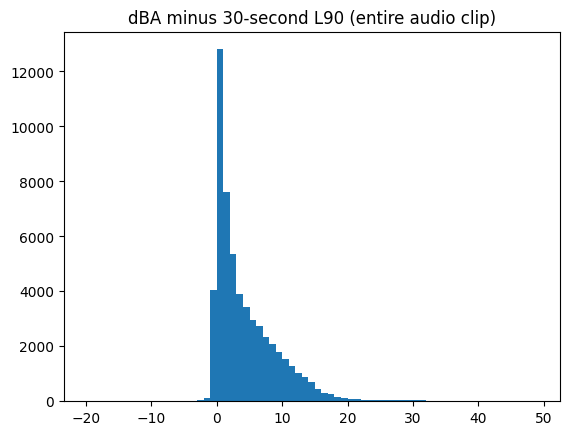

In [15]:
#df['diff'] = df['dBA']-df['mln30']
plt.hist(df['dBA']-df['mln30'], bins=diff_bins)
plt.title('dBA minus 30-second L90 (entire audio clip)')
plt.show()

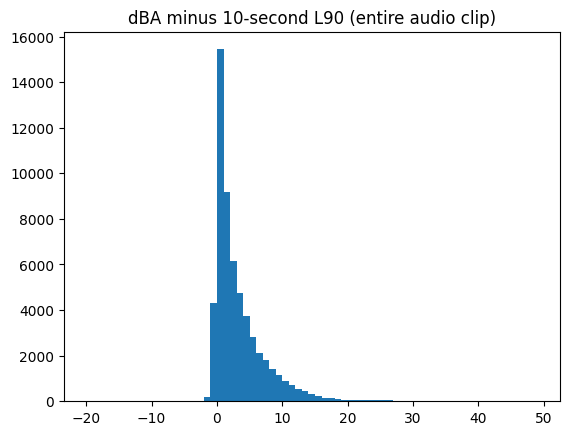

In [16]:
#df['diff'] = df['dBA']-df['mln10']
plt.hist(df['dBA']-df['mln10'], bins=diff_bins)
plt.title('dBA minus 10-second L90 (entire audio clip)')
plt.show()

### Time-series

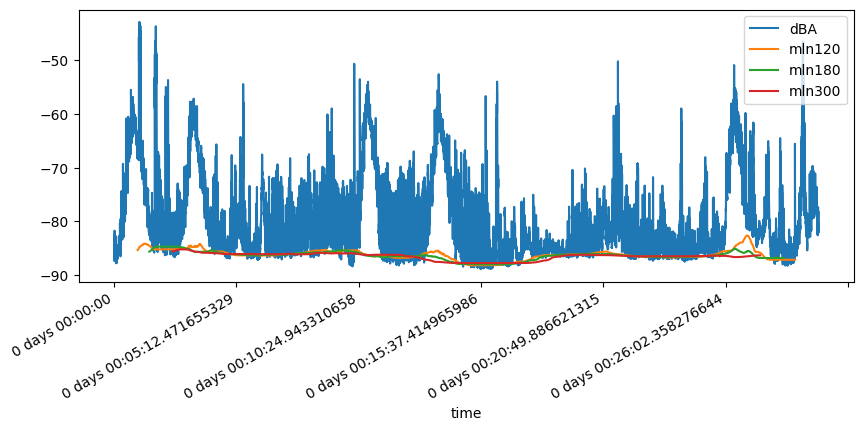

In [17]:
df.plot(y=['dBA', 'mln120', 'mln180', 'mln300'], figsize=(10,4))
plt.show()

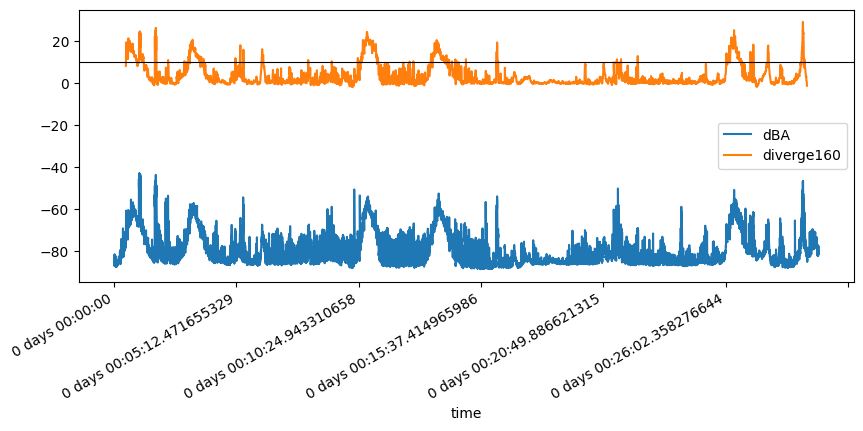

In [18]:
# "diverge160" takes the difference between 1-second rolling L90 and 60-second L90
df['diverge160'] = df['mln1'] - df['mln60']

df.plot(y=['dBA', 'diverge160'], figsize=(10,4))
plt.axhline(y=10, color='k', linewidth=0.8)
plt.show()